In [3]:
import warnings
warnings.filterwarnings("ignore")

# Read Data

In [4]:
import pandas as pd
from pandas import Series

In [5]:
data_analysis = pd.read_csv('./data_to_be_analysed/data_analysis_with_skills.csv')
data_mining = pd.read_csv('./data_to_be_analysed/data_mining_with_skills.csv')
machine_learning = pd.read_csv('./data_to_be_analysed/machine_learning_with_skills.csv')
business_analysis = pd.read_csv('./data_to_be_analysed/business_analysis_with_skills.csv')

---

In [6]:
data_analysis.shape

(1053, 21)

---

## 添加薪资均值

In [7]:
import re
# 均值函数
def average(job_salary):
    # 取薪资均值----------------
    pattern = re.compile('\d+')
    salary = job_salary
    try:
        res = re.findall(pattern, salary)
        avg_salary = 0
        sum = 0
        for i in res:
            a = int(i)
            sum = sum + a
            avg_salary = sum / 2
    except Exception:
        avg_salary = 0
    # 函数返回值
    return avg_salary

salary_list = []
for i in range(0,data_analysis.shape[0]):
    avg_sal = average(data_analysis['职位薪资'][i])
    salary_list.append(avg_sal)
sal = Series(salary_list)

data_analysis.insert(9,'salary',sal)

In [8]:
salary_list = []
for i in range(0,data_mining.shape[0]):
    avg_sal = average(data_mining['职位薪资'][i])
    salary_list.append(avg_sal)
sal = Series(salary_list)

data_mining.insert(9,'salary',sal)

In [9]:
salary_list = []
for i in range(0,machine_learning.shape[0]):
    avg_sal = average(machine_learning['职位薪资'][i])
    salary_list.append(avg_sal)
sal = Series(salary_list)

machine_learning.insert(9,'salary',sal)

In [10]:
salary_list = []
for i in range(0,business_analysis.shape[0]):
    avg_sal = average(business_analysis['职位薪资'][i])
    salary_list.append(avg_sal)
sal = Series(salary_list)

business_analysis.insert(9,'salary',sal)

---

# 薪资分布探索

In [11]:
data_analysis.salary.describe()

count    1053.000000
mean       16.632479
std         7.925945
min         1.500000
25%        11.000000
50%        15.000000
75%        22.500000
max        52.500000
Name: salary, dtype: float64

In [12]:
data_analysis.columns

Index(['Unnamed: 0', 'Keyword', '公司名称', '公司规模', '地区', '学历要求', '工作经验', '职位名称',
       '职位描述', 'salary', '职位薪资', '融资情况', 'Sql', 'Python', 'Excel', 'Sas',
       'Spss', 'Hive', 'Hadoop', 'Ppt', 'Tableau', 'Spark'],
      dtype='object')

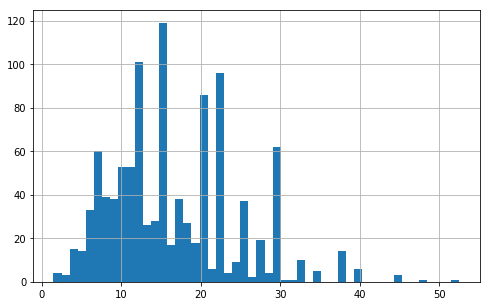

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
data_analysis.salary.hist(bins=50, figsize=(8,5))

plt.show()

- 薪资主要分布在**5k-30k**之间

In [14]:
data_analysis[data_analysis.salary>30].shape

(42, 22)

In [15]:
data_analysis[data_analysis.salary<5].shape

(22, 22)

In [16]:
data_analysis = data_analysis[data_analysis['salary']<30]
data_analysis = data_analysis[data_analysis['salary']>5]

---

In [17]:
data_analysis.head(2)

,Unnamed: 0,Keyword,公司名称,公司规模,地区,学历要求,工作经验,职位名称,职位描述,salary,...,Sql,Python,Excel,Sas,Spss,Hive,Hadoop,Ppt,Tableau,Spark
0,1,数据分析,上海恒奕集团,500-999人,上海 普陀区 武宁路,大专,1-3年,数据分析,岗位职责：通过抓取第三方数据来分析在不同地区，我们医院项目的目标人群画像分析，实时网络热度盘...,10.0,...,0,0,0,0,0,0,0,0,0,0
1,2,数据分析,晶赞科技,100-499人,上海 静安区 共和新路,本科,3-5年,数据分析,工作职责：1、负责政务数据/商业数据的研究和分析。例如，通过政务公开数据的挖掘和分析，形成主...,18.0,...,0,1,1,1,1,0,0,0,0,0


In [18]:
data_analysis = data_analysis.drop(['Unnamed: 0','Keyword','职位描述','职位薪资'],axis=1)

In [19]:
data_mining = data_mining.drop(['Unnamed: 0','Keyword','职位描述','职位薪资'],axis=1)

In [20]:
machine_learning = machine_learning.drop(['Unnamed: 0','Keyword','职位描述','职位薪资'],axis=1)

In [21]:
business_analysis = business_analysis.drop(['Unnamed: 0','Keyword','职位描述','职位薪资'],axis=1)

---

## 掌握的软件技能对薪资的影响关系

In [22]:
corr_matrix = data_analysis.corr()
corr_matrix["salary"].sort_values(ascending=False)

salary     1.000000
Python     0.249000
Hive       0.248617
Sql        0.248049
Spark      0.185153
Sas        0.164862
Hadoop     0.159602
Spss       0.071946
Tableau    0.068340
Ppt       -0.052048
Excel     -0.077646
Name: salary, dtype: float64

- **Data Analysis**的职位中，`Hive`,`Spark`,`Hadoop`大数据应用方面的软件是**薪资的加分项**。
- 同时，`Python`,`SQL`,`SAS`,`Tableau`,`SPSS`等统计分析软件与可视化软件也是数据分析师**区别于低薪分析专员**的因素。
- `PPT`,`Excel`作为必须的软件技能，对薪资变化**并没有太大的影响**，甚至仅仅会Excel的职位沦落为专员，会是一个减分项。
- 结论：在数据分析领域，拥有**大数据软件技能**并且懂得**Python**这一编程语言的分析师的待遇较好。

In [23]:
corr_matrix = data_mining.corr()
corr_matrix["salary"].sort_values(ascending=False)

salary    1.000000
Spark     0.199728
Java      0.196519
Hive      0.185769
C         0.159396
Hadoop    0.155124
Python    0.102946
Shell     0.037366
Linux     0.005632
Sql      -0.050092
Sas      -0.072597
Name: salary, dtype: float64

- **Data Mining**的职位中，`Hive`,`Spark`,`Hadoop`大数据方面的软件是薪资**极大的加分项**。
- `Java`,`C`,`Python`等编程语言对数据挖掘的工作有很大帮助因此也体现在了对薪资的**正面影响**上。
- 分析结论：具备**数据挖掘算法与编码能力**且具备**大数据方面分析技能**的数据挖掘工程师的待遇较好。

In [24]:
corr_matrix = machine_learning.corr()
corr_matrix["salary"].sort_values(ascending=False)

salary        1.000000
Spark         0.144507
Hive          0.116132
Hadoop        0.109608
Java          0.088857
Tensorflow    0.072449
Sql          -0.022844
C            -0.032998
Python       -0.054629
Linux        -0.058181
Matlab       -0.062595
Name: salary, dtype: float64

- **Machine Learning**的职位中，没有特别突出的技能加分项，列表中的软件技能基本都是入职必备的技能。
- `Hive`,`Spark`,`Hadoop`等大数据方面的技能会对薪资有一定程度的提升，不过影响较小。
- 分析结论：机器学习工程师入门难度稍高，需要掌握具备的软件技能也较多，没有特别突出的薪资加分项。

In [25]:
corr_matrix = business_analysis.corr()
corr_matrix["salary"].sort_values(ascending=False)

salary    1.000000
Python    0.394292
C         0.371366
Java      0.244305
Linux     0.242700
Hive      0.168359
Sql       0.107485
Sas       0.078156
Excel     0.068413
Ppt      -0.019429
Spss     -0.091822
Name: salary, dtype: float64

- **Business Analysis**的职位中，编程语言是**极大的薪资加分项**。如`C`,`Python`,`Java`。
- `Excel`,`PPT`,`SPSS`等软件是这个职位的**必备技能**，因此对职位薪资没有太大的影响。
- 结论：在商业分析领域，拥有**商业分析思维**并且具有**编程能力**的分析师的待遇较好。

---

# 模型方法选择

<pre>
线性回归
决策树回归
随机森林回归
KNN回归
Adaboost回归
GBRT回归
Bagging回归
ExtraTree极端随机树回归
</pre>

---

# 准备数据

In [26]:
data_analysis.head(2)

,公司名称,公司规模,地区,学历要求,工作经验,职位名称,salary,融资情况,Sql,Python,Excel,Sas,Spss,Hive,Hadoop,Ppt,Tableau,Spark
0,上海恒奕集团,500-999人,上海 普陀区 武宁路,大专,1-3年,数据分析,10.0,A轮,0,0,0,0,0,0,0,0,0,0
1,晶赞科技,100-499人,上海 静安区 共和新路,本科,3-5年,数据分析,18.0,D轮及以上,0,1,1,1,1,0,0,0,0,0


In [27]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_analysis, test_size=0.2, random_state=42)

In [28]:
data_train = train_set.copy()
data_test = test_set.copy()

In [29]:
data_train.shape

(737, 18)

In [30]:
data_test.shape

(185, 18)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [32]:
data_analysis.head(1)

,公司名称,公司规模,地区,学历要求,工作经验,职位名称,salary,融资情况,Sql,Python,Excel,Sas,Spss,Hive,Hadoop,Ppt,Tableau,Spark
0,上海恒奕集团,500-999人,上海 普陀区 武宁路,大专,1-3年,数据分析,10.0,A轮,0,0,0,0,0,0,0,0,0,0


In [33]:
data_analysis_num = data_analysis.drop(['公司名称','公司规模','地区','学历要求','工作经验','职位名称','融资情况','salary'], axis=1)
num_attribs = list(data_analysis_num)
cat_attribs = ['公司规模','学历要求','工作经验']

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

data_analysis_prepared = full_pipeline.fit_transform(data_train)
data_analysis_test = full_pipeline.transform(data_test)

In [34]:
data_analysis_prepared[:1]

array([[ 1.01779743,  1.15424368, -0.70135785, -0.56638197,  2.02058373,
        -0.40306397, -0.36822985, -0.36584991, -0.33908304, -0.26977806,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ]])

In [35]:
data_train.head(1)

,公司名称,公司规模,地区,学历要求,工作经验,职位名称,salary,融资情况,Sql,Python,Excel,Sas,Spss,Hive,Hadoop,Ppt,Tableau,Spark
527,上海兴致,0-20人,上海 浦东新区 八佰伴,本科,3-5年,高级数据分析师,22.5,0-20人,1,1,0,0,1,0,0,0,0,0


In [36]:
data_analysis_labels = data_train.salary.values
test_labels = data_test.salary.values

---

# 训练模型

## 线性回归

In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_analysis_prepared, data_analysis_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
from sklearn.metrics import mean_squared_error
import numpy as np

salary_predictions = lin_reg.predict(data_analysis_prepared)
lin_mse = mean_squared_error(data_analysis_labels, salary_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.209936980782373

In [39]:
#salary_predictions[:10]

### 测试集

In [40]:
#data_test.head(10)

In [41]:
y_test = lin_reg.predict(data_analysis_test)
y_test[:10]

array([19.13476562, 16.91992188, 14.8984375 , 14.0546875 , 20.76367188,
       12.19921875, 18.13671875, 16.45507812, 20.40917969, 19.90820312])

In [42]:
test_labels[:10]

array([20.5, 13. , 11.5, 12.5, 15. , 12.5, 22.5, 15. , 22.5, 15.5])

In [43]:
lin_mse = mean_squared_error(test_labels, y_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.252707451377156

- 测试集上误差约为**4.27**

### 交叉验证

In [44]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, data_analysis_prepared, data_analysis_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [45]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [4.54552557 4.54182215 3.94087967 4.42840937 4.4373358  4.62011098
 4.22660386 4.38725655 4.42436899 4.60889902]
Mean: 4.41612119574774
Standard deviation: 0.1935445501197603


---

## 决策树回归

### 建模训练

In [46]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(data_analysis_prepared, data_analysis_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [47]:
y_pred_tree = tree_reg.predict(data_analysis_prepared)

In [48]:
from sklearn.metrics import mean_squared_error

tree_mse = mean_squared_error(data_analysis_labels, y_pred_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

2.404700282979215

### 测试集

In [49]:
y_test = tree_reg.predict(data_analysis_test)
y_test[:10]

array([17.5       , 16.54166667, 14.75      ,  8.        , 18.75      ,
       16.5       , 17.5       ,  7.        , 17.125     , 18.83333333])

In [50]:
test_labels[:10]

array([20.5, 13. , 11.5, 12.5, 15. , 12.5, 22.5, 15. , 22.5, 15.5])

In [51]:
tree_mse = mean_squared_error(test_labels, y_test)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

5.585045537872495

- 测试集上误差约为**5.4**

---

## Random Forest 随机森林回归

### 建模训练

In [52]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=52)
forest_reg.fit(data_analysis_prepared, data_analysis_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=52, verbose=0, warm_start=False)

In [53]:
y_pred_rf = forest_reg.predict(data_analysis_prepared)
forest_mse = mean_squared_error(data_analysis_labels, y_pred_rf)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.825121630127617

### 测试集验证

In [54]:
#data_test[:10]

In [55]:
y_test = forest_reg.predict(data_analysis_test)
y_test[:10]

array([17.55      , 16.76213231, 14.82916667, 11.5       , 23.55      ,
       14.2       , 16.40416667, 12.9375    , 18.65738095, 20.11666667])

In [56]:
test_labels[:10]

array([20.5, 13. , 11.5, 12.5, 15. , 12.5, 22.5, 15. , 22.5, 15.5])

In [57]:
forest_mse = mean_squared_error(test_labels, y_test)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

4.53113932085526

- 测试集上误差约为**4.2**

### 交叉验证

In [58]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, data_analysis_prepared, data_analysis_labels,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [59]:
display_scores(forest_rmse_scores)

Scores: [4.49936847 5.16831172 3.87212271 5.10449212 4.76825042 4.95531615
 4.47363957 5.06157526 4.29351527 4.56866847]
Mean: 4.676526015420327
Standard deviation: 0.3920907106938965


---

## KNN回归

In [60]:
from sklearn.neighbors import KNeighborsRegressor
k = 5
knn_reg = KNeighborsRegressor(k)
knn_reg.fit(data_analysis_prepared, data_analysis_labels)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [61]:
y_pred_knn = knn_reg.predict(data_analysis_prepared)
knn_mse = mean_squared_error(data_analysis_labels, y_pred_knn)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

4.181154008963998

### 交叉验证

In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn_reg, data_analysis_prepared, data_analysis_labels,
                         scoring="neg_mean_squared_error", cv=10)
knn_rmse_scores = np.sqrt(-scores)


display_scores(knn_rmse_scores)

Scores: [4.91189951 5.22354338 4.69300803 5.17542269 5.59779155 6.05515193
 5.07427268 5.46580904 4.81125962 4.8222089 ]
Mean: 5.183036732034127
Standard deviation: 0.40101789362628404


### 测试集验证

In [63]:
y_test = knn_reg.predict(data_analysis_test)
print(y_test[:10])
print(test_labels[:10])

[18.7 17.  16.5 16.5 18.3 14.2 16.2 11.3 18.2 20.3]
[20.5 13.  11.5 12.5 15.  12.5 22.5 15.  22.5 15.5]


In [64]:
knn_mse = mean_squared_error(test_labels, y_test)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

4.933569509808097

---

# Adaboost回归

In [65]:
from sklearn.ensemble import AdaBoostRegressor
Adaboost_reg = AdaBoostRegressor(n_estimators=50)#这里使用50个决策树
Adaboost_reg.fit(data_analysis_prepared, data_analysis_labels)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

### 交叉验证

In [66]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(Adaboost_reg, data_analysis_prepared, data_analysis_labels,
                         scoring="neg_mean_squared_error", cv=10)
Adaboost_rmse_scores = np.sqrt(-scores)

In [67]:
display_scores(Adaboost_rmse_scores)

Scores: [4.53692111 4.64122254 4.21608294 4.86740635 5.06359292 4.66208335
 4.47708546 4.9059454  4.66957261 4.18020659]
Mean: 4.622011927255484
Standard deviation: 0.2698669328833233


### 测试集验证

In [68]:
y_test = Adaboost_reg.predict(data_analysis_test)
print(y_test[:10])
print(test_labels[:10])

[18.77375566 17.37943925 15.03588517 15.14973262 19.29107981 13.7369338
 17.37943925 13.7369338  20.0625     18.39631336]
[20.5 13.  11.5 12.5 15.  12.5 22.5 15.  22.5 15.5]


In [69]:
Adaboost_mse = mean_squared_error(test_labels, y_test)
Adaboost_rmse = np.sqrt(Adaboost_mse)
Adaboost_rmse

4.503983133229124

---

## GBRT回归

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
grbt_reg = GradientBoostingRegressor(n_estimators=100)#这里使用100个决策树
grbt_reg.fit(data_analysis_prepared, data_analysis_labels)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

### 交叉验证

In [71]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(grbt_reg, data_analysis_prepared, data_analysis_labels,
                         scoring="neg_mean_squared_error", cv=10)
grbt_rmse_scores = np.sqrt(-scores)

display_scores(grbt_rmse_scores)

Scores: [4.87398002 4.73250604 3.68256834 4.29583401 4.61267134 4.84613495
 4.14931613 4.34059763 4.23123641 4.40989281]
Mean: 4.417473768953092
Standard deviation: 0.34596795982823186


### 测试集验证

In [72]:
y_test = grbt_reg.predict(data_analysis_test)
print(y_test[:10])
print(test_labels[:10])

[18.43702936 17.57478885 14.06200524 14.74538168 21.77043023 14.45351525
 18.47068341 14.04148627 19.616117   20.43899639]
[20.5 13.  11.5 12.5 15.  12.5 22.5 15.  22.5 15.5]


In [73]:
grbt_mse = mean_squared_error(test_labels, y_test)
grbt_rmse = np.sqrt(grbt_mse)
grbt_rmse

4.290941809182011

---

## Bagging回归

In [74]:
from sklearn.ensemble import BaggingRegressor
bagging_reg = BaggingRegressor()
bagging_reg.fit(data_analysis_prepared, data_analysis_labels)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

### 交叉验证

In [75]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(bagging_reg, data_analysis_prepared, data_analysis_labels,
                         scoring="neg_mean_squared_error", cv=10)
bagging_rmse_scores = np.sqrt(-scores)

display_scores(bagging_rmse_scores)

Scores: [4.46370865 5.11419751 4.10735786 5.0408061  5.26292997 4.96593935
 4.71601577 4.93185359 4.59819981 4.63789738]
Mean: 4.783890598234823
Standard deviation: 0.32866956869503


### 测试集验证

In [76]:
y_test = bagging_reg.predict(data_analysis_test)
print(y_test[:10])
print(test_labels[:10])

[17.53333333 16.95503081 15.19285714 11.65       19.43928571 14.36
 18.40166667 11.55       17.67583333 19.52738095]
[20.5 13.  11.5 12.5 15.  12.5 22.5 15.  22.5 15.5]


In [77]:
bagging_mse = mean_squared_error(test_labels, y_test)
bagging_rmse = np.sqrt(bagging_mse)
bagging_rmse

4.851544621491279

---

# 模型拟合效果评价

In [78]:
model_list = [lin_rmse,tree_rmse,forest_rmse,knn_rmse,Adaboost_rmse,grbt_rmse,bagging_rmse]
model_name = ['linear','tree','forest','knn','Adaboost','grbt','bagging']
i = 0
for model in model_list:
    print(model_name[i],'在测试集上的误差表现为：',model)
    i+=1

linear 在测试集上的误差表现为： 4.252707451377156
tree 在测试集上的误差表现为： 5.585045537872495
forest 在测试集上的误差表现为： 4.53113932085526
knn 在测试集上的误差表现为： 4.933569509808097
Adaboost 在测试集上的误差表现为： 4.503983133229124
grbt 在测试集上的误差表现为： 4.290941809182011
bagging 在测试集上的误差表现为： 4.851544621491279


---

# 网格搜索调参

### 对随机森林进行参数探索调整

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

#grbt_reg = GradientBoostingRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(data_analysis_prepared, data_analysis_labels)

C:\Users\13626\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [80]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5.230290790238236 {'max_features': 2, 'n_estimators': 3}
4.828374365895161 {'max_features': 2, 'n_estimators': 10}
4.755202551631041 {'max_features': 2, 'n_estimators': 30}
5.064133429590988 {'max_features': 4, 'n_estimators': 3}
4.770620452203674 {'max_features': 4, 'n_estimators': 10}
4.698809097897846 {'max_features': 4, 'n_estimators': 30}
5.09938179972705 {'max_features': 6, 'n_estimators': 3}
4.7206651591273845 {'max_features': 6, 'n_estimators': 10}
4.687999289996666 {'max_features': 6, 'n_estimators': 30}
5.072523426909564 {'max_features': 8, 'n_estimators': 3}
4.75724488427645 {'max_features': 8, 'n_estimators': 10}
4.708816709801628 {'max_features': 8, 'n_estimators': 30}
5.388487805697899 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
5.0528879660893775 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
5.316193794492318 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
5.022162677508516 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In [81]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

## 变量重要性

In [82]:
feature_importances = grid_search.best_estimator_.feature_importances_
#feature_importances

In [83]:
num_attribs = list(data_analysis_num)
cat_attribs = ['公司规模','学历要求','工作经验']

In [84]:
# 变量重要性排序
attributes = num_attribs + cat_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.06256050964151738, 'Sql'),
 (0.05996157379002209, 'Hive'),
 (0.05833431092085402, 'Python'),
 (0.05536655983841162, 'Sas'),
 (0.039090728357453634, 'Excel'),
 (0.0372204358630469, 'Spss'),
 (0.03173383704493009, 'Spark'),
 (0.029334029896999316, '学历要求'),
 (0.027283707992806678, '工作经验'),
 (0.026729166721593346, 'Tableau'),
 (0.025363715544763292, 'Hadoop'),
 (0.018739070532311868, 'Ppt'),
 (0.016549484575144015, '公司规模')]

- **公司规模**对薪资的影响相比之下比较小。

---

# 最终模型

In [85]:
final_model = grid_search.best_estimator_
final_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [86]:
scores = cross_val_score(final_model, data_analysis_prepared, data_analysis_labels,
                         scoring="neg_mean_squared_error", cv=10)
final_model_rmse_scores = np.sqrt(-scores)

In [87]:
display_scores(final_model_rmse_scores)

Scores: [4.53008814 5.08441071 3.97171206 4.80954518 5.01055618 4.71745052
 4.66927057 4.74793007 4.18567529 4.34334473]
Mean: 4.606998345081946
Standard deviation: 0.3353022753836264


- 交叉验证误差为**4.56**

---

# 薪资预测

In [88]:
final_predictions = final_model.predict(data_analysis_test)

In [89]:
salary_test_series = Series(final_predictions,index=data_test.index)

In [90]:
data_test_prediction = data_test.copy()
data_test_prediction.insert(7,'prediction',salary_test_series)

In [91]:
data_test_prediction.sample(10)

,公司名称,公司规模,地区,学历要求,工作经验,职位名称,salary,prediction,融资情况,Sql,Python,Excel,Sas,Spss,Hive,Hadoop,Ppt,Tableau,Spark
602,旗计智能,1000-9999人,上海 浦东新区 张江,本科,3-5年,数据分析主管/经理（风险方向）,25.0,17.123016,已上市,1,1,1,1,0,0,0,0,0,0
260,速网电商,100-499人,上海 闵行区 莘庄,本科,1-3年,数据分析,10.0,11.195915,不需要融资,0,0,0,0,0,0,0,0,0,0
512,Oriente,500-999人,上海 黄浦区 人民广场,本科,3-5年,数据分析师,27.5,19.633333,B轮,1,1,0,1,0,0,1,0,0,0
1027,儒傲会软件定制,20-99人,上海 嘉定区 江桥,本科,5-10年,系统数据分析师招募要求（儒傲会）,17.5,19.751667,天使轮,1,0,0,0,0,0,0,0,0,0
787,华数康,100-499人,上海 长宁区 古北,学历不限,经验不限,数据分析师,22.5,11.050000,B轮,0,0,0,1,0,0,0,0,0,0
85,上海深界信息科技,0-20人,上海 徐汇区 漕河泾,大专,1-3年,数据分析师,12.5,13.820000,不需要融资,0,1,0,1,0,1,0,0,0,0
368,汉云信息,100-499人,上海 长宁区 天山路,本科,1-3年,互联网数据分析师,9.0,10.550000,不需要融资,1,0,1,0,0,0,0,0,0,0
907,饿了么,1000-9999人,上海 普陀区 金沙江路,本科,3-5年,运力规划/数据分析,22.5,17.009510,D轮及以上,0,0,0,0,0,0,0,0,0,0
1050,上海翔鸢信息科技,20-99人,上海 青浦区 赵巷,大专,经验不限,王者荣耀数据分析师,7.0,7.725000,20-99人,0,0,1,0,0,0,0,0,0,0
917,观安信息,100-499人,上海 普陀区 金沙江路,本科,5-10年,大数据安全产品经理,25.0,25.044444,B轮,0,0,0,0,0,0,0,0,0,0


- 预测结果与实际薪资相比误差在**可接受范围内**。

# 预测函数接口

In [92]:
data_test.head(1)

,公司名称,公司规模,地区,学历要求,工作经验,职位名称,salary,融资情况,Sql,Python,Excel,Sas,Spss,Hive,Hadoop,Ppt,Tableau,Spark
361,携程旅行网,10000人以上,上海 长宁区 北新泾,本科,3-5年,海外运营数据分析师,20.5,已上市,1,1,0,0,0,0,0,0,0,0


In [93]:
from pandas import DataFrame

### 预测功能函数

In [94]:
def prediction_function(scale,degree,experience,v_skills):
    predict_X = {
        '公司规模':[scale],
        '学历要求':[degree],
        '工作经验':[experience],
        'Sql':[v_skills[0]],
        'Python':[v_skills[1]],
        'Excel':[v_skills[2]],
        'Sas':[v_skills[3]],
        'Spss':[v_skills[4]],
        'Hive':[v_skills[5]],
        'Hadoop':[v_skills[6]],
        'Ppt':[v_skills[7]],
        'Tableau':[v_skills[8]],
        'Spark':[v_skills[9]],
    }
    predict_tmp = pd.DataFrame(predict_X)
    X_predict = full_pipeline.transform(predict_tmp)
    return X_predict

### 技能转换函数

In [95]:
def skills_switch(skill_list):
    tmp_list = []
    skills = ['Sql','Python','Excel','Sas','Spss','Hive','Hadoop','Ppt','Tableau','Spark']
    for skill in skills:
        # 大小写转换
        if skill in skill_list:
            tmp_list.append(1)
        else:
            tmp_list.append(0)
    return tmp_list

### 预测主函数

In [96]:
def predict(scale,degree,experience,v_skills):
    X_predict = prediction_function(scale,degree,experience,v_skills)
    Y_predict = final_model.predict(X_predict)
    print('预测薪资为：',Y_predict[0],'k/month')

---

<pre>
企业规模：['10000人以上' '1000-9999人' '20-99人' '0-20人' '500-999人' '100-499人']
学历：['本科' '大专' '学历不限' '硕士']
工作经验：['3-5年' '1-3年' '经验不限' '5-10年' '1年以内' '应届生']
Skills:[Sql,Python,Excel,Sas,Spss,Hive,Hadoop,Ppt,Tableau,Spark]
</pre>

### 预测函数

In [97]:
#-----------设置变量
scale = '10000人以上'
degree = '本科'
experience = '1-3年'
# ------------------
# --------设置所掌握的技能（顺序无关）
mastered_skills = ['Sql','Python','Excel','Spss','Ppt']
v_skills = skills_switch(mastered_skills)
# -----------------------------------
predict(scale,degree,experience,v_skills)

预测薪资为： 12.14722222222222 k/month


In [98]:
experiences = ['应届生','1年以内', '1-3年','3-5年', '5-10年' ]

for exp in experiences:
    print(scale,'|',degree,'|',exp,'|',",".join(mastered_skills))
    predict(scale,degree,exp,v_skills)
    print('-'*60)

10000人以上 | 本科 | 应届生 | Sql,Python,Excel,Spss,Ppt
预测薪资为： 13.066666666666666 k/month
------------------------------------------------------------
10000人以上 | 本科 | 1年以内 | Sql,Python,Excel,Spss,Ppt
预测薪资为： 13.308333333333334 k/month
------------------------------------------------------------
10000人以上 | 本科 | 1-3年 | Sql,Python,Excel,Spss,Ppt
预测薪资为： 12.14722222222222 k/month
------------------------------------------------------------
10000人以上 | 本科 | 3-5年 | Sql,Python,Excel,Spss,Ppt
预测薪资为： 20.964444444444446 k/month
------------------------------------------------------------
10000人以上 | 本科 | 5-10年 | Sql,Python,Excel,Spss,Ppt
预测薪资为： 23.97222222222222 k/month
------------------------------------------------------------


---

In [101]:
experience = '1-3年'
scale = '500-999人'
degrees = ['学历不限','大专','本科','硕士']

for degree in degrees:
    print(scale,'|',degree,'|',experience,'|',",".join(mastered_skills))
    predict(scale,degree,exp,v_skills)
    print('-'*60)

500-999人 | 学历不限 | 1-3年 | Sql,Python,Excel,Spss,Ppt
预测薪资为： 21.625 k/month
------------------------------------------------------------
500-999人 | 大专 | 1-3年 | Sql,Python,Excel,Spss,Ppt
预测薪资为： 19.925 k/month
------------------------------------------------------------
500-999人 | 本科 | 1-3年 | Sql,Python,Excel,Spss,Ppt
预测薪资为： 23.091666666666665 k/month
------------------------------------------------------------
500-999人 | 硕士 | 1-3年 | Sql,Python,Excel,Spss,Ppt
预测薪资为： 20.791666666666668 k/month
------------------------------------------------------------
